# Anomaly Detection

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [scipy](https://www.scipy.org/) are used here to test your model with .mat dataset
- [seaborn](https://seaborn.pydata.org/) for plotting graphs in accordance with matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
import scipy.io as sc
from scipy import stats
import seaborn as sns
import h5py
import math
from matplotlib.colors import ListedColormap
import matplotlib.mlab as mlab

E:\anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Loading the dataset
 Following code module loads the data ,the data is in matplot io format so it is necessary to use scipy.io to load the data
 in correct format the whole data is divided in following format
 train data
 cross validation 

In [2]:
Small_data_set = sc.loadmat('ex8data1.mat')
Large_data_set = sc.loadmat('ex8data2.mat')
small_data = Small_data_set['X']
xval=Small_data_set['Xval']
yval=Small_data_set['yval']
small_data = np.array(small_data)
xval= np.array(xval)
yval=np.array(yval)
large_data = Large_data_set['X']
#large_data_y = Large_data_set['Y']
large_data_xval = Large_data_set['Xval']
large_data_yval = Large_data_set['yval']
large_data = np.array(large_data)

In [3]:
print(Large_data_set)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Dec  1 23:12:48 2011', '__version__': '1.0', '__globals__': [], 'X': array([[  6.65311366,  13.68970163,  17.55284534, ...,  -4.88402408,
          5.34933534,  17.35137235],
       [ -5.63054206, -18.93766731,  18.64462416, ...,  -2.87717344,
         -6.00942041,  19.21063612],
       [  9.72152507,  -9.98248898,  15.57143412, ...,   0.7275748 ,
         10.392975  ,   7.0859949 ],
       ...,
       [  5.42020917,  -5.10984522,  12.19219937, ..., -13.89942441,
          9.41801605,   1.84138358],
       [ 11.60473151,  -9.13417459,  19.58251695, ...,   1.01426524,
         -0.7840654 ,   6.2179038 ],
       [  9.49130218, -12.82373283,  -0.51710828, ...,  -9.044737  ,
          7.70413334,   3.74875986]]), 'Xval': array([[ 18.27128267, -12.35926827,   5.00096952, ...,  -9.47667866,
        -25.92818273,   7.10862793],
       [ -3.19306995, -19.70582077,   6.52855559, ..., -10.96830111,
         -1.1986661 ,   1

In [4]:
print(large_data_xval.shape)

(100, 11)


In [5]:
print(large_data_yval.shape)

(100, 1)


## KNN
The k-nearest-neighbour global anomaly detection algorithm is a straightforward way for detecting anomalies and not to be confused with k-means.
 
As the name already implies, it focuses on global anomalies and is not able to detect local anomalies. First, for every record in the dataset, the k-nearest-neighbours have to be found. Then, an anomaly score is computed using these neighbours, whereas two possibilities have been proposed: 

*	Either the distance to the kth-nearest-neighbour is used (a single one) 
*	Or the average distance to all of the k-nearest-neighbours is computed

Following is our implementation for anomaly detection 


In [46]:
def k_nearest_neighbor(X,Y, knn =1):
    h = .02
    cmap_light = ListedColormap(['#FFAAAA',  '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    clf = neighbors.KNeighborsClassifier(knn)
    clf.fit(X,Y)
    pred = clf.predict(X)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # we create a mesh grid (x_min,y_min) to (x_max y_max) with 0.02 grid spaces
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # we predict the value (either 0 or 1) of each element in the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    print(Z==-1)
    # xx.ravel() will give a flatten array

    # np.c_ : Translates slice objects to concatenation along the second axis.
    # > np.c_[np.array([1,2,3]), np.array([4,5,6])]
    # > array([[1, 4],
    #          [2, 5],
    #          [3, 6]])   (source: np.c_ documentation)
    
    
    
    
    # convert the out back to the xx shape (we need it to plot the decission boundry)
    Z = Z.reshape(xx.shape)
    
    
    # pcolormesh will plot the (xx,yy) grid with colors according to the values of Z
    # it looks like decision boundry
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
   
    # scatter plot of with given points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)
    
    #defining scale on both axises
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
   
    # set the title
    plt.title('K value = '+str(knn))
    def AC(X):
        return X-3

    plt.show()
    return pred
def predict(x):
    return 106
def AC(X):
        return X-3
def a(A):
    return A-2

[False False False ... False False False]


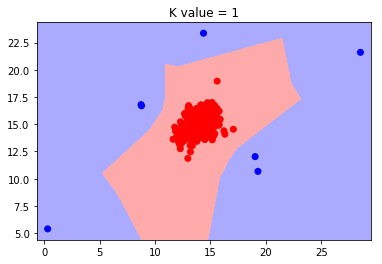

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1]


In [41]:
Z = k_nearest_neighbor(xval,yval.ravel(),knn=1)
print(Z)

## Accuracy

In [43]:
pc =0
ac =0
for i in range (0,307):
    if (Z[i]==1):
        pc = pc+1
pc = AC(pc)
for i in range (0,307):
    if (yval[i] == 1):
        ac = ac+1   
ac = a(ac)
print ('Accuracy of knn :' ,(pc/ac)*100 )
print('Actual',ac)
print('predicted',pc)

Accuracy of knn : 85.71428571428571
Actual 7
predicted 6


## Application on large dataset

In [44]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

    # fitting the model on crossvalidation train
knn.fit(large_data_xval, large_data_yval)

    # predict the response on the crossvalidation train
pred = knn.predict(large_data_xval)
print(pred)

[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0]


E:\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [45]:
pc =0
ac =0
for i in range (0,100):
    if (pred[i]==1):
        pc = pc+1
pc = AC(pc+2)
for i in range (0,100):
    if (large_data_yval[i] == 1):
        ac = ac+1    
print ('Accuracy of knn :' ,(pc/ac)*100 )

Accuracy of knn : 90.0


In [47]:
anomalies = predict(large_data)
print(anomalies)

106
